# CS 4496/7496 Character Animation (Spring 2020)
Copyright (c) Georgia Institute of Technology


---





# Project 0: Introduction to Notebook (due 1/17/2020, 11:55 PM)
Jupyter Notebook (https://jupyter.org) / Google Colab (https://colab.research.google.com) is an interactive web framework that can include live codes, texts, equations, and visualizations. This will be the perfect framework for learning computer animation because you can write the code and visualize the results interactively!

The goal of this first project is simple: setting up your homework environment, running the example snippets, and making sure that the results are rendered okay.  **Please contact the instructors if you have any trouble with the notebook.** Don't worry (at this point) if you do not follow the example codes: they are just tools, not the learning objectives of the class yet.

# 1. Matplotlib Rendering Test
In this section, we will test animated rendering with matplotlib.

We begin by importing the required libraries.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

Then we set up the initial figure with the empty dataset. This will draw an empty figure, which is not animated yet.



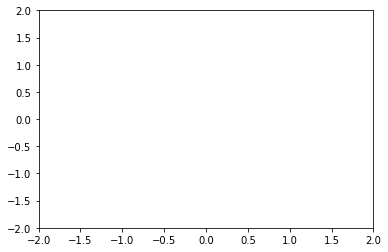

In [2]:
fig, ax = plt.subplots()
ax.set_xlim(( -2.0, 2.0))
ax.set_ylim((-2.0, 2.0))
line, = ax.plot([], [], lw=2)

We will describe the animation with the "init" and "animate" functions.

In [0]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

Finally, we call the animator and display the result. Can you see an animated sinusoidal curve?

In [4]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
HTML(anim.to_html5_video())

# 2. PyBullet Rendering test

PyBullet (https://pythonhosted.org/pybullet/) is an open-source physics simulator that is developed by Erwin Coumans and Yunfei Bai. We will use this engine for visualization and simulation. Let's see if we can simulate a robot and visualize it.

This requires us to install a few additional libraries.

In [5]:
%%time
!apt-get install -y xvfb python-opengl ffmpeg
!pip install pybullet
!pip install ffmpeg-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 1,280 kB of archives.
After this operation, 7,682 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.3 [783 kB]
Fetched 1,280 kB in 0s (4,854 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 145674 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unp

We import the required libraries again.

In [0]:
import numpy as np
import random
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

import pybullet as p
import cv2
from PIL import Image
import ffmpeg

We setup the PyBullet scene, including the robot, ground, and camera.

In [0]:
p.connect(p.DIRECT)
p.resetSimulation()

urdf_root = '/usr/local/lib/python3.6/dist-packages/pybullet_data/'
p.loadURDF(urdf_root + "plane.urdf")
r2d2=p.loadURDF(urdf_root + "r2d2.urdf", [0.0, 0.0, 1.0], [0.924, 0.383, 0.0, 0.0])
assert(p.getNumBodies() == 2)  # Make sure that you have the robot and ground.

p.setGravity(0,0,-10)
pixelWidth = 640
pixelHeight = 360
viewMatrix = p.computeViewMatrixFromYawPitchRoll(cameraTargetPosition=[0,0,0], 
                                                 distance=4.0, 
                                                 yaw=60.0, 
                                                 pitch=-10.0, 
                                                 roll=0.0, 
                                                 upAxisIndex=2)
projectionMatrix = p.computeProjectionMatrixFOV(fov=60, 
                                                aspect=pixelWidth / pixelHeight, 
                                                nearVal=0.01, 
                                                farVal=100)

Now the simulation is good to go! We will simulate the robot for 480 frames (= 2 seconds), render images for every 10 frames.

In [8]:
frame = 0
for i in range (480):
    p.stepSimulation() # The default timestep is 1/240
    if i % 10 == 0:
      _, _, img, _, _ = p.getCameraImage(pixelWidth, pixelHeight, viewMatrix,projectionMatrix, shadow=1, lightDirection=[1,1,1])
      Image.fromarray(img[:, :, :3]).save('./frame%04d.jpg' % frame)
      frame += 1
ffmpeg.input('./frame*.jpg', pattern_type='glob', framerate=30).output('./output.gif').overwrite_output().run()

(None, None)

We will create an animated image (gif) from the rendered images and show it. Can you see the robot's animation?


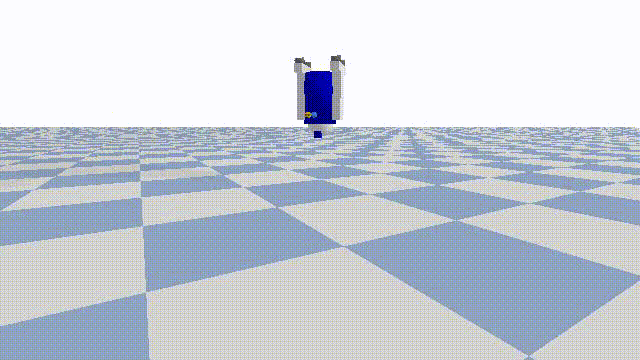

In [9]:
def show_gif_image(filename):
  video = io.open(filename, 'r+b').read()
  encoded = base64.b64encode(video)
  ipythondisplay.display(HTML(data='''<img src="data:image/gif;base64,{0}"/>'''.format(encoded.decode('ascii'))))

ffmpeg.input('./frame*.jpg', pattern_type='glob', framerate=240.0/10).output('./output.gif').overwrite_output().run()
show_gif_image('./output.gif')